In [7]:
import os
os.environ["BROWSER"] = "cmd.exe /C start"
print(os.environ["BROWSER"])


cmd.exe /C start


In [ ]:

# urdfで保存しつつモデル定義
urdf_str = """

<robot name="simple_arm">

  <!-- worldリンク -->
  <link name="universe"/>

  <joint name="joint1" type="revolute">
    <parent link="universe"/>
    <child link="link1"/>
    <origin xyz="0 0 0" rpy="0 0 0"/>
    <axis xyz="0 1 0"/>
    <limit effort="10.0" lower="-3.14" upper="3.14" velocity="5.0"/>
  </joint>
  
  <!-- link1 -->
  <link name="link1">
    <inertial>
      <mass value="1.0"/>
      <origin xyz="0 0 0.5"/>
      <inertia ixx="0.1" iyy="0.1" izz="0.1" ixy="0" ixz="0" iyz="0"/>
    </inertial>
  </link>

  <!-- joint2: link1 -> link2 -->
  <joint name="joint2" type="revolute">
    <parent link="link1"/>
    <child link="link2"/>
    <origin xyz="0 0 1.0" rpy="0 0 0"/>
    <axis xyz="0 1 0"/>
    <limit effort="10.0" lower="-3.14" upper="3.14" velocity="5.0"/>
  </joint>

  <!-- link2 -->
  <link name="link2">
    <inertial>
      <mass value="1.0"/>
      <origin xyz="0 0 0.5"/>
      <inertia ixx="0.1" iyy="0.1" izz="0.1" ixy="0" ixz="0" iyz="0"/>
    </inertial>
  </link>

  <!-- joint3: link2 -> link3 -->
  <joint name="joint3" type="revolute">
    <parent link="link2"/>
    <child link="link3"/>
    <origin xyz="0 0 1.0" rpy="0 0 0"/>
    <axis xyz="0 1 0"/>
    <limit effort="10.0" lower="-3.14" upper="3.14" velocity="5.0"/>
  </joint>

  <!-- link3 -->
  <link name="link3">
    <inertial>
      <mass value="1.0"/>
      <origin xyz="0 0 0.5"/>
      <inertia ixx="0.1" iyy="0.1" izz="0.1" ixy="0" ixz="0" iyz="0"/>
    </inertial>
  </link>

  <joint name="joint4" type="revolute">
    <parent link="link3"/>
    <child link="ee_link"/>
    <origin xyz="0 0 1.0" rpy="0 0 0"/>
    <axis xyz="0 1 0"/>
    <limit effort="10.0" lower="-3.14" upper="3.14" velocity="5.0"/>
  </joint>

  <link name="ee_link">
    <visual>
      <geometry>
        <cylinder length="0.2" radius="0.02"/>
      </geometry>
      <origin xyz="0 0 0.1" rpy="0 0 0"/>
    </visual>
    <inertial>
      <mass value="0.1"/>
      <origin xyz="0 0 0.1"/>
      <inertia ixx="0.0001" iyy="0.0001" izz="0.0001" ixy="0" ixz="0" iyz="0"/>
    </inertial>
  </link>

  <joint name="ee_tip" type="fixed"> <!-- ここがエンドエフェクタ用の固定ジョイント -->
    <parent link="ee_link"/>
    <child link="dummy_link"/>
    <origin xyz="0 0 0.5" rpy="0 0 0"/>
  </joint>

  <link name="dummy_link"/>
  
</robot>


"""

with open("./robots/my_robot.urdf", "w") as f:
    f.write(urdf_str)


URDFファイルを ./robots/sample_arm_dof2.urdf に保存しました。自由度: 2


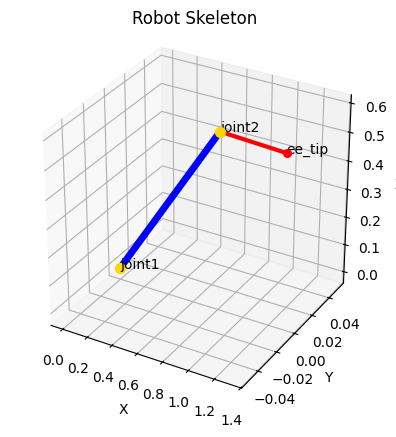

<Axes3D: title={'center': 'Robot Skeleton'}, xlabel='X', ylabel='Y', zlabel='Z'>

In [475]:
# モデル構築関数
def generate_simple_arm_urdf(dof, filepath=None):
    if filepath is None:
        filepath = f"./robots/sample_arm_dof{dof}.urdf"
    urdf_str = f'<robot name="simple_arm_dof{dof}">\n\n  <link name="universe"/>\n\n'

    # 各ジョイントとリンクの定義
    for i in range(1, dof):
        parent_link = "universe" if i == 1 else f"link{i-1}"
        child_link = f"link{i}"

        urdf_str += f'''  <joint name="joint{i}" type="revolute">
    <parent link="{parent_link}"/>
    <child link="{child_link}"/>
    <origin xyz="0 0 {0 if i==1 else 1.0}" rpy="0 0 0"/>
    <axis xyz="0 1 0"/>
    <limit effort="10.0" lower="-3.14" upper="3.14" velocity="5.0"/>
  </joint>\n\n'''

        urdf_str += f'''  <link name="{child_link}">
    <inertial>
      <mass value="1.0"/>
      <origin xyz="0 0 0.5"/>
      <inertia ixx="0.1" iyy="0.1" izz="0.1" ixy="0" ixz="0" iyz="0"/>
    </inertial>
  </link>\n\n'''

    # エンドエフェクタリンクとジョイント
    urdf_str += f'''  <joint name="joint{dof}" type="revolute">
    <parent link="link{dof-1}"/>
    <child link="ee_link"/>
    <origin xyz="0 0 1.0" rpy="0 0 0"/>
    <axis xyz="0 1 0"/>
    <limit effort="10.0" lower="-3.14" upper="3.14" velocity="5.0"/>
  </joint>\n\n'''

    urdf_str += '''  <link name="ee_link">
    <visual>
      <geometry>
        <cylinder length="0.2" radius="0.02"/>
      </geometry>
      <origin xyz="0 0 0.1" rpy="0 0 0"/>
    </visual>
    <inertial>
      <mass value="0.1"/>
      <origin xyz="0 0 0.1"/>
      <inertia ixx="0.0001" iyy="0.0001" izz="0.0001" ixy="0" ixz="0" iyz="0"/>
    </inertial>
  </link>\n\n'''

    # エンドエフェクタの固定ジョイント
    urdf_str += '''  <joint name="ee_tip" type="fixed">
    <parent link="ee_link"/>
    <child link="dummy_link"/>
    <origin xyz="0 0 0.5" rpy="0 0 0"/>
  </joint>\n\n'''

    urdf_str += '  <link name="dummy_link"/>\n\n</robot>\n'

    # ファイルへ書き込み
    with open(filepath, "w") as f:
        f.write(urdf_str)

    print(f"URDFファイルを {filepath} に保存しました。自由度: {dof}")
    return filepath

model = pin.buildModelFromUrdf(generate_simple_arm_urdf(dof=2))
plot_robot_skeleton_3D(model,random_q(model),detail=True)



In [470]:
import pinocchio as pin
from pinocchio import SE3
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 可視化関連
import os
import pinocchio as pin
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML, display


def plot_robot_skeleton_2D(model, q, ax=None, show=True, detail=False, title='Robot Arm 2D', plane='xz', max_range=None):
    """
    Pinocchioモデルの現在姿勢を2Dプロットする関数
    """
    # 順運動学を計算
    data = model.createData()
    pin.forwardKinematics(model, data, q)
    pin.framesForwardKinematics(model, data, q)

    # プロット用意
    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 6))

    # 各ジョイントの位置を取得
    positions = [np.array([0.0, 0.0])]  # ワールド原点

    # 平面選択
    if plane in ('xy', 'yx'):
        axis_idx = (0, 1)
    elif plane in ('yz', 'zy'):
        axis_idx = (1, 2)
    elif plane in ('zx', 'xz'):
        axis_idx = (0, 2)
    else:
        raise ValueError(f"Unknown plane: {plane}")
    axis_idx = np.array(axis_idx)

    for i in range(1, model.njoints):
        pos = data.oMi[i].translation
        pos = pos[axis_idx]
        positions.append(pos)
        if detail:
            ax.text(pos[0],pos[1], model.names[i])
    positions = np.array(positions)



    ax.plot(positions[:, 0], positions[:, 1], 'o-', linewidth=3, markersize=10, 
            markerfacecolor='gold', markeredgecolor='blue', c='blue')
    
    for frame_id, frame in enumerate(model.frames):
        if frame.name=="ee_tip":
            parent_id = frame.parentJoint
            pos = data.oMf[frame_id].translation[axis_idx]
            parent_pos = data.oMi[parent_id].translation[axis_idx]
            xs, ys = zip(parent_pos, pos)
            ax.plot(xs, ys, c='r',linewidth=3)
            ax.scatter(pos[0], pos[1], c='r', s=30, marker='o')
            if detail:
                ax.text(pos[0], pos[1], frame.name)     

    # # 軸設定
    if max_range is None:
        total_length = np.sum([np.linalg.norm(data.oMi[i].translation - data.oMi[i-1].translation)
                            for i in range(1, model.njoints)]) + 0.5
    else:
        total_length = max_range*1.3
    ax.set_xlim(-total_length, total_length)
    ax.set_ylim(-total_length, total_length)
    ax.set_aspect('equal')
    ax.grid(True)
    ax.set_title(title)
    ax.set_xlabel('X' if axis_idx[0]==0 else 'Y')
    ax.set_ylabel('Y' if axis_idx[1]==1 else 'Z')
    if not detail:
        ax.set_xticklabels([])
        ax.set_yticklabels([])

    if show:
        plt.show()

    return ax


# ロボットのスケルトンを描画する関数(3D)
def plot_robot_skeleton_3D(model, q, ax=None, show=True, detail=False, title='Robot Arm 3D', max_range=None):
    # データオブジェクト生成
    data = model.createData()
    
    # 順運動学計算
    pin.forwardKinematics(model, data, q)
    pin.framesForwardKinematics(model, data, q)

    if ax is None:
        # 3Dプロットセットアップ
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')


    # ジョイントの位置記録用
    joint_positions = []

    for joint_id in range(1, model.njoints):
        oMi = data.oMi[joint_id]  # ワールド座標系での姿勢
        pos = oMi.translation
        joint_positions.append(pos)
        # 親ジョイントとの接続線を引く
        parent_id = model.parents[joint_id]
        if parent_id > 0:  # universe以外
            parent_pos = data.oMi[parent_id].translation
            xs, ys, zs = zip(parent_pos, pos)
            ax.plot(xs, ys, zs, c='b', linewidth=5)

        # ジョイントの位置に点を打つ
        ax.scatter(pos[0], pos[1], pos[2], c='gold', s=50, marker='o')
        if detail:
            ax.text(pos[0], pos[1], pos[2], model.names[joint_id])
      
    # エンドエフェクタも描画
    for frame_id, frame in enumerate(model.frames):
        if frame.name=="ee_tip":
            parent_id = frame.parentJoint
            pos = data.oMf[frame_id].translation
            parent_pos = data.oMi[parent_id].translation
            xs, ys, zs = zip(parent_pos, pos)
            ax.plot(xs, ys, zs, c='r',linewidth=3)
            ax.scatter(pos[0], pos[1], pos[2], c='r', s=30, marker='o')
            if detail:
                ax.text(pos[0], pos[1], pos[2], frame.name)

    # 描画範囲設定
    if max_range is not None:
        max_range *= 0.7
        ax.set_xlim([-max_range, max_range])
        ax.set_ylim([-max_range, max_range])
        ax.set_zlim([-max_range, max_range])

    # グラフ調整
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Robot Skeleton')
    ax.set_box_aspect([1,1,1])  # アスペクト比固定
    if not detail:
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.set_zticklabels([])  # 3Dなら

    if show:
        plt.show()
    return ax

# 呼び出し例（モデルと状態ベクトルqが必要）
# plot_robot_skeleton(model, q)

def plot_motion(model, qs, dt=0.1, movie=None, is_3d=True, detail=False, plane='xz'):
    """
    2Dロボットの動きをアニメーション表示・保存する関数

    Parameters
    ----------
    model : pinocchio.Model
        ロボットモデル
    data : pinocchio.Data
        ロボットデータ
    qs : ndarray (T, n)
        各時刻の関節角度列
    dt : float
        シミュレーションの時間刻み [s]
        0.1  = 10fps(default)
        0.05 = 20fps
        0.033= 30fps
    movie : str or None
        保存するファイル名。拡張子付き。NoneならJupyter内で表示。
    is_3d : bool
        3D表示
    """
    # animationの時間幅に変換
    interval = dt * 1000 # dt(sec) → interval(msec)
    # 軌跡の長さ
    time_steps = qs.shape[0]
    # fpsを計算
    fps = 1/dt


    max_range = 0.0

    for joint_id in range(1, model.njoints):
        # この関節の親座標系からの位置ベクトル（トランスレーション）
        length_vec = model.jointPlacements[joint_id].translation
        # 選択した軸の長さ成分のノルム（もしくは単純な距離でもOK）
        link_length = np.linalg.norm(length_vec)
        max_range += link_length

    for frame_id, frame in enumerate(model.frames):
        if frame.name=="ee_tip":
            length_vec = model.frames[frame_id].placement.translation
            link_length = np.linalg.norm(length_vec)
            max_range += link_length

    if is_3d:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
    else:
        fig, ax = plt.subplots(figsize=(6,6))

    def update(frame):
        ax.cla()
        q = qs[frame]
        time = frame * dt
        if is_3d:
            plot_robot_skeleton_3D(model, q, ax=ax, show=False, detail=detail, max_range=max_range)
            # 軸範囲の取得
            xlim = ax.get_xlim()
            ylim = ax.get_ylim()
            zlim = ax.get_zlim()
            # 軸範囲の右上あたりに表示
            ax.text(
                xlim[1]*0.9, ylim[1]*0.9, zlim[1]*0.9,  # 表示位置
                f"Time: {time:.2f} s\nFrame: {frame}\nFPS: {fps:.1f}", 
                ha='left', va='top',
                fontsize=7, color='black',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3', alpha=0.8)
                )
        else:
            plot_robot_skeleton_2D(model, q, ax=ax, show=False, detail=detail, plane=plane, max_range=max_range)
            xlim = ax.get_xlim()
            ylim = ax.get_ylim()

            ax.text(
                xlim[1]*0.9, ylim[1]*0.9, 
                f"Time: {time:.2f} s\nFrame: {frame}\nFPS: {fps:.1f}", 
                ha='left', va='top',
                fontsize=7, color='black',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3', alpha=0.8)
                )
        return ax,

    ani = animation.FuncAnimation(
        fig, update, frames=time_steps, interval=interval, blit=False
    )

    if movie is None:
        print("not saved")
        display(HTML(ani.to_jshtml()))
    
    if movie is not None:
        #movieの拡張子を判別してそれにあった処理をする
        # movieの拡張子を取得
        base, ext = os.path.splitext(movie)

        if ext == '':
            # 拡張子がなければ .gif を付けて保存
            movie = movie + '.gif'
            print(f"saving as '{movie}'...")
            ani.save(movie, writer='pillow', fps=fps)
            print(f"saved as {movie}")
        
        elif ext.lower() in ['.gif']:
            print(f"saving as '{movie}'...")
            ani.save(movie, writer='pillow', fps=fps)
            print(f"saved as {movie}")
        
        elif ext.lower() in ['.mp4', '.mov', '.avi']:
            print(f"saving as '{movie}'...")
            ani.save(movie, writer='ffmpeg', fps=fps)
            print(f"saved as {movie}")
        
        else:
            # それ以外なら test_motion.gif にする
            print("Unsupported extension — saving as 'test_motion.gif'...")
            ani.save('test_motion.gif', writer='pillow', fps=fps)
            print(f"saved as 'test_motion.gif'")
    return


# 例
# time_steps = 50
# dt = 0.1
# qz = pin.neutral(model)
# start, end = qz, np.ones_like(qz)*np.pi*2
# energies = []
# for seed in range(10):
#     qs = random_qs_spline(model, time_steps, start, end, same_limits(model.nq),seed=seed)
#     energy = compute_total_energy(model,data,qs,time_steps,dt)
#     print(f"energy({seed}): {energy}")
#     energies.append(energy)
# max(energies)
# plot_motion(model, qs, dt=dt, detail=False, is_3d=True)


In [274]:
%matplotlib inline

In [ ]:
# 可視化関連
import os
import pinocchio as pin
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML, display


def plot_robot_model_2d(model, data, q, ax=None, show=True, title='Robot Arm 2D'):
    """
    Pinocchioモデルの現在姿勢を2Dプロットする関数
    """
    # 順運動学を計算
    pin.forwardKinematics(model, data, q)

    # 各ジョイントの位置を取得
    positions = [np.array([0.0, 0.0])]  # ワールド原点
    for i in range(1, model.njoints):
        pos = data.oMi[i].translation
        positions.append(pos[:2])

    positions = np.array(positions)

    # プロット用意
    if ax is None:
        fig, ax = plt.subplots(figsize=(6, 6))

    ax.plot(positions[:, 0], positions[:, 1], 'o-', linewidth=3, markersize=10, 
            markerfacecolor='white', markeredgecolor='black')

    # 軸設定
    total_length = np.sum([np.linalg.norm(data.oMi[i].translation - data.oMi[i-1].translation)
                           for i in range(1, model.njoints)]) + 0.5
    ax.set_xlim(-total_length, total_length)
    ax.set_ylim(-total_length, total_length)
    ax.set_aspect('equal')
    ax.grid(True)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    if show:
        plt.show()

    return

# q = np.array([np.deg2rad(30), np.deg2rad(-45)])  # 任意の姿勢
# plot_robot_model_2d(model, data, q)

import matplotlib.animation as animation
import pinocchio as pin
import numpy as np
import matplotlib.pyplot as plt

def plot_robot_2d(model, data, q, ax=None, title=None):
    
    # 順運動学の計算
    pin.forwardKinematics(model, data, q)
    
    # 座標リスト
    positions = [np.array([0.0, 0.0])]  # ワールド原点

    for i in range(1, model.njoints):
        oMi = data.oMi[i]
        pos = oMi.translation
        positions.append(pos[:2])

    positions = np.array(positions)

    # プロット
    if ax is None:
        fig, ax = plt.subplots(figsize=(6,6))

    ax.clear()
    ax.plot(positions[:,0], positions[:,1], 'o-', 
            linewidth=4,
            markersize=10,
            markerfacecolor='white',
            markeredgecolor='black'
            )
    ax.set_aspect('equal')
    ax.grid(True)
    if title is not None:
        ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_xlim(-2.5, 2.5)
    ax.set_ylim(-2.5, 2.5)

    return positions


def plot_motion(model, qs, dt=0.1, movie=None, ):
    """
    2Dロボットの動きをアニメーション表示・保存する関数

    Parameters
    ----------
    model : pinocchio.Model
        ロボットモデル
    data : pinocchio.Data
        ロボットデータ
    qs : ndarray (T, n)
        各時刻の関節角度列
    dt : float
        シミュレーションの時間刻み [s]
        0.1  = 10fps(default)
        0.05 = 20fps
        0.033= 30fps
    movie : str or None
        保存するファイル名。拡張子付き。NoneならJupyter内で表示。
    """
    # animationの時間幅に変換
    interval = dt * 1000 # dt(sec) → interval(msec)
    # 軌跡の長さ
    time_steps = qs.shape[0]
    # fpsを計算
    fps = 1/dt

    fig, ax = plt.subplots(figsize=(6,6))

    def update(frame):
        q = qs[frame]
        plot_robot_skeleton(model, q, ax)
        ax.set_title(f"Frame {frame}")
        return ax,

    ani = animation.FuncAnimation(
        fig, update, frames=time_steps, interval=interval, blit=False
    )

    if movie is None:
        print("not saved")
        display(HTML(ani.to_jshtml()))
    
    if movie is not None:
        #movieの拡張子を判別してそれにあった処理をする
        # movieの拡張子を取得
        base, ext = os.path.splitext(movie)

        if ext == '':
            # 拡張子がなければ .gif を付けて保存
            movie = movie + '.gif'
            print(f"saving as '{movie}'...")
            ani.save(movie, writer='pillow', fps=fps)
            print(f"saved as {movie}")
        
        elif ext.lower() in ['.gif']:
            print(f"saving as '{movie}'...")
            ani.save(movie, writer='pillow', fps=fps)
            print(f"saved as {movie}")
        
        elif ext.lower() in ['.mp4', '.mov', '.avi']:
            print(f"saving as '{movie}'...")
            ani.save(movie, writer='ffmpeg', fps=fps)
            print(f"saved as {movie}")
        
        else:
            # それ以外なら test_motion.gif にする
            print("Unsupported extension — saving as 'test_motion.gif'...")
            ani.save('test_motion.gif', writer='pillow', fps=fps)
            print(f"saved as 'test_motion.gif'")
    return


In [125]:
pin.neutral(model).shape

(3,)

2025-06-09 03:58:42,356 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.HTMLWriter'>


energy(0): 6140.102185846693
energy(1): 27658.82727460177
energy(2): 10962.330377507626
energy(3): 7095.272838613025
energy(4): 5570.85655043207
energy(5): 13828.319671810685
energy(6): 6135.435418834669
energy(7): 11819.015162234627
energy(8): 7439.126978519527
energy(9): 13211.673181323713
not saved


TypeError: Axes.scatter() got multiple values for argument 's'

Error in callback <function _draw_all_if_interactive at 0x7f9ba6278280> (for post_execute), with arguments args (),kwargs {}:


TypeError: Axes.scatter() got multiple values for argument 's'

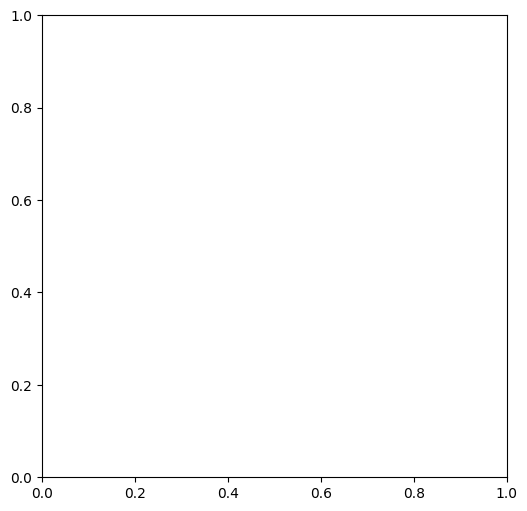

In [407]:
# スプライン関連
import numpy as np
from scipy.interpolate import PchipInterpolator, CubicSpline
import pinocchio as pin
import pyswarms as ps


# 軌跡からエネルギーを計算する関数
def compute_total_energy(model, data, qs, time_steps, dt):
    total_energy = 0.0

    for t in range(time_steps-1):
        q_current = qs[t]
        q_next = qs[t+1]
        dq = (q_next - q_current) / dt

        pin.computeAllTerms(model, data, q_current, dq)
        tau = pin.rnea(model, data, q_current, dq, np.zeros_like(dq))

        energy = np.sum(np.abs(tau * dq)) * dt
        total_energy += energy

    return total_energy

# qs_flat(T * nq)をqs_traj(T, nq)の形状を持つ軌跡データに成形
def reshape_qs_from_flat(qs_flat, time_steps, nq):
    assert qs_flat.shape[0] == time_steps * nq, "qs_flat must have shape (T * nq,)"
    return qs_flat.reshape((time_steps, nq))

# 0~1のランダムな値をモデルの関節の可動域に拡大
def expand_random_to_joint_limits(qs_norm, nq, limits=None):
    qs_expanded = np.zeros_like(qs_norm)
    if limits is None:
        lowers, uppers = model.lowerPositionLimit, model.upperPositionLimit
    else:
        lowers, uppers = limits[0], limits[1]
    for i in range(nq):
        lower, upper = lowers[i], uppers[i]
        qs_expanded[:, i] = lower + (upper - lower) * qs_norm[:, i]
    return qs_expanded

def random_q(model):
    nq = model.nq
    qs = np.random.rand(nq)
    return qs

# 毎ステップでランダムな関節角度を生成（使わない）
def random_qs(nq, time_steps, limits=None, seed=0):
    np.random.seed(seed)
    qs_flat = np.random.rand(time_steps * nq)
    qs_norm = reshape_qs_from_flat(qs_flat, time_steps, nq)
    return expand_random_to_joint_limits(qs_norm, model, limits=limits)

# 全関節で共通の可動域
def same_limits(nq, lower=-np.pi, upper=np.pi):
    lowers = [lower for _ in range(nq)]
    uppers = [upper for _ in range(nq)]
    limits = [lowers, uppers]
    return np.array(limits)

def random_qs_spline(model, time_steps, start, end, limits=None, num_knots=5, seed=0):
    # 始点と終点の形状を確認
    q_shape = pin.neutral(model).shape
    assert start.shape == q_shape, f"start.shape {start.shape} and end.shape {end.shape} must match model's q_shape {q_shape}"
    assert end.shape == q_shape, f"start.shape {start.shape} and end.shape {end.shape} must match model's q_shape {q_shape}"

    # ランダムシード初期化
    np.random.seed(seed)

    nq = model.nq

    # 可動域の設定
    if limits is None:
        lowers = model.lowerPositionLimit
        uppers = model.upperPositionLimit
    else:
        if len(limits) == 1:
            limits = same_limits(nq, lower=limits[0], upper=limits[1])
        lowers, uppers = limits
    lowers = np.array(lowers)
    uppers = np.array(uppers)

    # 始点と終点の範囲を確認
    # startのすべての関節角度に対して、それぞれが可動域に収まっていなければassertする。
    # endも同様

    # スプラインの制御点の時間軸
    control_times = np.linspace(0, time_steps-1, num=num_knots)
    times = np.arange(time_steps)

    # 関節ごとの軌跡を格納する配列
    qs = np.zeros((time_steps, nq))
    
    for j in range(nq):
        # 始点と終点を固定
        control_values = np.zeros(num_knots)
        control_values[0] = start[j]
        control_values[-1] = end[j]

        # 中間の制御点をランダムに生成
        control_values[1:-1] = np.random.uniform(lowers[j], uppers[j], num_knots-2)

        # CubicSpline補完
        # cs = PchipInterpolator(control_times, control_values)
        cs = CubicSpline(control_times, control_values, bc_type='clamped')

        # 時系列データ生成
        q_traj = cs(times)
        qs[:, j] = q_traj
    return qs

def qs_from_particle(particle, model, time_steps, start, end, limits, num_knots=5):
    """
    len(particle) = (num_knots - 2) * nq
    """
    # 始点と終点の形状を確認
    q_shape = pin.neutral(model).shape
    assert start.shape == q_shape, f"start.shape {start.shape} and end.shape {end.shape} must match model's q_shape {q_shape}"
    assert end.shape == q_shape, f"start.shape {start.shape} and end.shape {end.shape} must match model's q_shape {q_shape}"

    nq = model.nq

    # 可動域の設定
    if len(limits) == 1:
        limits = same_limits(nq, lower=limits[0], upper=limits[1])
    lowers, uppers = limits
    lowers = np.array(lowers)
    uppers = np.array(uppers)

    # 始点と終点の範囲を確認
    # startのすべての関節角度に対して、それぞれが可動域に収まっていなければassertする。
    # endも同様

    # スプラインの制御点の時間軸
    control_times = np.linspace(0, time_steps-1, num=num_knots)
    times = np.arange(time_steps)

    # 関節ごとの軌跡を格納する配列
    qs = np.zeros((time_steps, nq))
    
    for j in range(nq):
        # 始点と終点を固定
        control_values = np.zeros(num_knots)
        control_values[0] = start[j]
        control_values[-1] = end[j]

        # particleを中間の制御点に設定
        control_values[1:-1] = particle[nq*j:nq*(j+1)]

        # CubicSpline補完
        cs = PchipInterpolator(control_times, control_values)
        # cs = CubicSpline(control_times, control_values, bc_type='clamped')

        # 時系列データ生成
        q_traj = cs(times)
        qs[:, j] = q_traj
    return qs

# 例
time_steps = 50
dt = 0.02
qz = pin.neutral(model)
start, end = qz, np.ones_like(qz)*np.pi*2
energies = []
for seed in range(10):
    qs = random_qs_spline(model, time_steps, start, end, same_limits(model.nq),seed=seed)
    energy = compute_total_energy(model,data,qs,time_steps,dt)
    print(f"energy({seed}): {energy}")
    energies.append(energy)
max(energies)
plot_motion(model, qs)


In [189]:
# 最適化関連
import numpy as np
from scipy.interpolate import PchipInterpolator, CubicSpline
import pinocchio as pin
import pyswarms as ps
from functools import partial

# 軌跡からエネルギーを計算する関数
def compute_total_energy(model, data, qs, time_steps, dt):
    total_energy = 0.0

    for t in range(time_steps-1):
        q_current = qs[t]
        q_next = qs[t+1]
        dq = (q_next - q_current) / dt

        pin.computeAllTerms(model, data, q_current, dq)
        tau = pin.rnea(model, data, q_current, dq, np.zeros_like(dq))

        energy = np.sum(np.abs(tau * dq)) * dt
        total_energy += energy

    return total_energy


# 軌跡からジャークを計算する関数
def compute_total_jerk(qs, dt):
    ddq = np.diff(qs, n=2, axis=0) / (dt**2)
    dddq = np.diff(ddq, n=1, axis=0) / dt
    jerk_cost = np.sum(dddq**2) * dt
    return jerk_cost


# 一次元

# 粒子群最適化用の目的関数
# エネルギーのみ
def objective_energy(particles, model, data, start, end, limits, time_steps, dt, num_knots):
    # particles.shape = (n_particles, dimensions)
    costs = []
    for particle in particles:
        # particle.shape = ((num_knots - 2)*nq,)
        # フラットなベクトルを(time_steps, nq)に変換
        qs = qs_from_particle(particle,
                              model=model,
                              time_steps=time_steps,
                              start=start,
                              end=end,
                              limits=limits,
                              num_knots=num_knots)
        cost = compute_total_energy(model, data, qs, time_steps, dt)
        costs.append(cost)
    return np.array(costs)

def objective_jerk(particles, model, data, start, end, limits, time_steps, dt, num_knots):
    # particles.shape = (n_particles, dimensions)
    costs = []
    for particle in particles:
        # particle.shape = ((num_knots - 2)*nq,)
        # フラットなベクトルを(time_steps, nq)に変換
        qs = qs_from_particle(particle,
                              model=model,
                              time_steps=time_steps,
                              start=start,
                              end=end,
                              limits=limits,
                              num_knots=num_knots)
        cost = compute_total_jerk(qs, dt) + compute_total_energy(model,data,qs,time_steps,dt)
        costs.append(cost)
    return np.array(costs)

def optimize_energy(model, data, start, end, limits, time_steps, dt, num_knots=5, n_particles=30):
    dimensions = (num_knots - 2) * model.nq
    options = {'c1': 1.5, 'c2': 1.5, 'w': 0.9}
    optimizer = ps.single.GlobalBestPSO(n_particles=n_particles, dimensions=dimensions, options=options)

    # partialでほかの引数をバインド
    obj_func = partial(objective_energy,
                       model=model,
                       data=data,
                       start=start,
                       end=end,
                       limits=limits,
                       time_steps=time_steps,
                       dt=dt,
                       num_knots=num_knots)
    
    best_cost, best_pos = optimizer.optimize(obj_func, iters=100)
    return best_cost, best_pos

def optimize_jerk(model, data, start, end, limits, time_steps, dt, num_knots=5, n_particles=30):
    dimensions = (num_knots - 2) * model.nq
    options = {'c1': 1.5, 'c2': 1.5, 'w': 0.9}
    optimizer = ps.single.GlobalBestPSO(n_particles=n_particles, dimensions=dimensions, options=options)

    # partialでほかの引数をバインド
    obj_func = partial(objective_jerk,
                       model=model,
                       data=data,
                       start=start,
                       end=end,
                       limits=limits,
                       time_steps=time_steps,
                       dt=dt,
                       num_knots=num_knots)
    
    best_cost, best_pos = optimizer.optimize(obj_func, iters=100)
    return best_cost, best_pos

# 例
pi = np.pi
tau = 2*pi
time_steps = 100
dt = 0.05
qz = pin.neutral(model)
start = qz
# end = np.array([pi,pi,pi])
end = np.array([tau,tau,tau])
limits = same_limits(model.nq)
num_knots = 5
best_cost, best_particle = optimize_jerk(model,data,start,end,limits,time_steps,dt,n_particles=100)
qs = qs_from_particle(best_particle,
                      model=model,
                      time_steps=time_steps,
                      start=start,
                      end=end,
                      limits=limits,
                      num_knots=num_knots)
# print("最適コスト:", best_cost)
# print("最適軌道形状:", qs)
plot_motion(model,data,qs,dt=dt)
        

2025-06-08 23:39:53,945 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 1.5, 'c2': 1.5, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=60.7 
2025-06-08 23:40:08,395 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 60.67830214995489, best pos: [1.10956508 2.25016753 4.09023267 0.67800035 1.55426567 3.28584909
 0.8565682  1.75602398 3.37407711]


<IPython.core.display.Javascript object>

2025-06-08 23:40:08,409 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.HTMLWriter'>


not saved


In [170]:
plot_motion(model,data,qs,dt=dt)

<IPython.core.display.Javascript object>

2025-06-08 22:53:19,622 - matplotlib.animation - INFO - Animation.save using <class 'matplotlib.animation.HTMLWriter'>


not saved


In [121]:
# 例
dt = 0.01 # エネルギー計算のための時間刻み
time_steps = 1000 # 軌跡の時間ステップ数
qs = random_qs(model, 1000, seed=42)
total_energy = compute_total_energy(qs, model, data, time_steps, dt)


/tmp/ipykernel_213525/125710941.py:36: RuntimeWarning: overflow encountered in scalar subtract
  qs_expanded[:, i] = lower + (upper - lower) * qs_norm[:, i]
/tmp/ipykernel_213525/125710941.py:10: RuntimeWarning: invalid value encountered in subtract
  dq = (q_next - q_current) / dt


In [ ]:
pin.neutral(model)
print("下限:", model.lowerPositionLimit)
print("上限:", model.upperPositionLimit)
print("速度制限:", model.velocityLimit)
print("トルク制限:", model.effortLimit)


In [40]:
from scipy.optimize import minimize

# 初期値と目標値を適当に設定
q_start = np.array([...])
q_goal = np.array([...])
time_steps = 50
dt = 0.05

# 線形補間で初期軌道
qs_init = np.linspace(q_start, q_goal, time_steps)

# 最適化実行
res = minimize(
    compute_total_energy,
    qs_init.flatten(),
    args=(model, data, time_steps, dt),
    method='L-BFGS-B',
    options={'disp': True}
)


TypeError: unsupported operand type(s) for -: 'ellipsis' and 'ellipsis'